In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#-------------------------------Original Code---------------------------------------------

## After training the network, whatever accuracy you get is your base accuracy. Epochs = 100

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


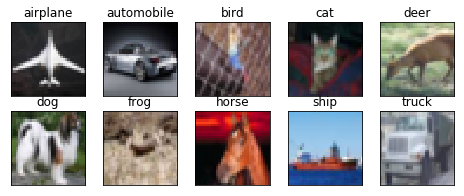

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)



---


#-----------------------------------------MODIFIED---------------------------------------


---



###2. Fix the network above: 
Normal Convolution

Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))

Depthwise Separable Convolution

Grouped Convolution (use 3x3, 5x5 only)

Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 

You must use all of the 5 above at least once

Train this new model for 50 epochs. 

Save File as Assignment 6B

In [0]:
from keras.layers import Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.layers.merge import add,concatenate
import keras


#Functional API

In [0]:



#Normal convolution
input_shape=(32, 32, 3)
input = Input(shape=input_shape)

con_1 = (Convolution2D(24, 3, 3, border_mode='same'))(input) ##Receptive_Field=3
con_1 = (BatchNormalization())(con_1)
con_1 = (Activation('relu'))(con_1)


con_point_1 = Convolution2D(24, 1, 1)(con_1) #Receptive_Field=3
con_point_1 = Activation('relu')(con_point_1)

#Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
con_ss_1 = Convolution2D(48, 3, 1, border_mode='same')(con_point_1) #Receptive_Field=5
con_ss_1 = BatchNormalization()(con_ss_1)
con_ss_1 = Activation('relu')(con_ss_1)

con_ss_2 = Convolution2D(48, 1, 3, border_mode='same')(con_ss_1) #Receptive_Field=5
con_ss_2 = BatchNormalization()(con_ss_2)
con_ss_2 = Activation('relu')(con_ss_2)


con_point_2 = Convolution2D(48, 1, 1)(con_ss_2) #Receptive_Field=5
con_point_2 = Activation('relu')(con_point_2)


max_1 = MaxPooling2D(pool_size=(2, 2))(con_point_2) #Receptive_Field=10

#Depthwise Separable Convolution

# con_sep_1 = Convolution2D(48, 3, 3, border_mode='same')) #Receptive_Field=12
con_sep_1 =keras.layers.SeparableConv2D(48, (3,3), strides=(1, 1), padding='same', data_format=None, 
                                       dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=True, 
                                       depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform',
                                       bias_initializer='zeros', depthwise_regularizer=None, pointwise_regularizer=None, bias_regularizer=None,
                                       activity_regularizer=None, depthwise_constraint=None, pointwise_constraint=None, bias_constraint=None)(max_1 )
con_sep_1 = BatchNormalization()(con_sep_1)
con_sep_1 = Activation('relu')(con_sep_1)


con_point_3 = Convolution2D(48, 1, 1)(con_sep_1) #Receptive_Field=12
con_point_3 = Activation('relu')(con_point_3)



# model.add(Convolution2D(96, 3, 3, border_mode='same')) #Receptive_Field=14
# model.add(BatchNormalization())
# model.add(Activation('relu'))

con_sep_2 =keras.layers.SeparableConv2D(96, (3,3), strides=(1, 1), padding='same', data_format=None, 
                                       dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=True, 
                                       depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform',
                                       bias_initializer='zeros', depthwise_regularizer=None, pointwise_regularizer=None, bias_regularizer=None,
                                       activity_regularizer=None, depthwise_constraint=None, pointwise_constraint=None, bias_constraint=None)(con_point_3)
con_sep_2  = BatchNormalization()(con_sep_2)
con_sep_2  = Activation('relu')(con_sep_2)


con_point_4 = (Convolution2D(96, 1, 1))(con_sep_2 ) #Receptive_Field=14
con_point_4 = (Activation('relu'))(con_point_4)



max_2 = MaxPooling2D(pool_size=(2, 2))(con_point_4)#Receptive_Field=24

#Grouped Convolution (use 3x3, 5x5 only)

con_2 = Convolution2D(192, 5, 5,  border_mode='same',dilation_rate=(1, 1))(max_2) #Receptive_Field=26
con_2 = BatchNormalization()(con_2)
con_2 = Activation('relu')(con_2)

con_point_5 = Convolution2D(96, 1, 1)(con_2) #Receptive_Field=26
con_point_5 = Activation('relu')(con_point_5)

con_3 = Convolution2D(96, 3, 3,  border_mode='same',dilation_rate=(1, 1))(max_2) #Receptive_Field=26
con_3 = BatchNormalization()(con_3)
con_3 = Activation('relu')(con_3)

con_point_6 = Convolution2D(96, 1, 1)(con_3) #Receptive_Field=26
con_point_6 = Activation('relu')(con_point_6)

con_4 = Convolution2D(192, 3, 3,  border_mode='same',dilation_rate=(2, 2))(max_2) #Receptive_Field=26
con_4 = BatchNormalization()(con_4)
con_4 = Activation('relu')(con_4)

con_point_7 = Convolution2D(96, 1, 1)(con_4) #Receptive_Field=26
con_point_7 = Activation('relu')(con_point_7)

add_1 = add([con_point_6,con_point_7])
concat_1 = concatenate([con_point_5,add_1])

con_5 = Convolution2D(10, 8, 8)(concat_1) #Receptive_Field=


flat_1 = Flatten()(con_5)
activation = Activation('softmax') (flat_1)
          
          
model = Model(inputs=input, outputs=activation)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (1, 1))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_114 (Conv2D)             (None, 32, 32, 24)   672         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_66 (BatchNo (None, 32, 32, 24)   96          conv2d_114[0][0]                 
__________________________________________________________________________________________________
activation_128 (Activation)     (None, 32, 32, 24)   0           batch_normalization_66[0][0]     
__________________________________________________________________________________________________
conv2d_115

In [0]:
from keras.utils import plot_model
plot = plot_model(model,to_file='/content/gdrive/My Drive/Colab Notebooks/EVA/6/model.png')


In [0]:
import cv2
model_plot = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/EVA/6/model.png')



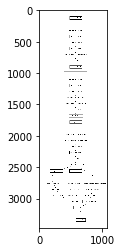

In [0]:
import matplotlib.pyplot as plt
plt.imshow(model_plot)

In [0]:
from keras.callbacks import  ModelCheckpoint

filepath="/content/gdrive/My Drive/Colab Notebooks/EVA/6/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
#file path store weights in google drive

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# Store the weights when the validation accuracy increases

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.002 * 1/(1 + 0.119 * epoch), 10)


from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=.25, 
                             featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,                           
                             vertical_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 #callbacks=[checkpoint],#,LearningRateScheduler(scheduler, verbose=1)],
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 32s 82ms/step - loss: 1.9150 - acc: 0.3200 - val_loss: 2.0877 - val_acc: 0.2824
Epoch 2/50
390/390 [==============================] - 27s 69ms/step - loss: 1.5151 - acc: 0.4514 - val_loss: 1.6893 - val_acc: 0.4177
Epoch 3/50
390/390 [==============================] - 27s 69ms/step - loss: 1.3646 - acc: 0.5074 - val_loss: 1.5347 - val_acc: 0.4705
Epoch 4/50
390/390 [==============================] - 27s 69ms/step - loss: 1.2448 - acc: 0.5539 - val_loss: 1.5950 - val_acc: 0.4854
Epoch 5/50
390/390 [==============================] - 27s 69ms/step - loss: 1.1609 - acc: 0.5833 - val_loss: 1.5150 - val_acc: 0.5311
Epoch 6/50
390/390 [==============================] - 27s 69ms/step - loss: 1.0956 - acc: 0.6078 - val_loss: 1.6225 - val_acc: 0.4814
Epoch 7/50
390/390 [==============================] - 27s 69ms/step - loss: 1.0445 - acc: 0.6272 - val_loss: 1.1804 - val_acc: 0.6031
Epoch 8/50
390/390 [==============================] - 27s 68ms/step - los

Model took 1348.90 seconds to train


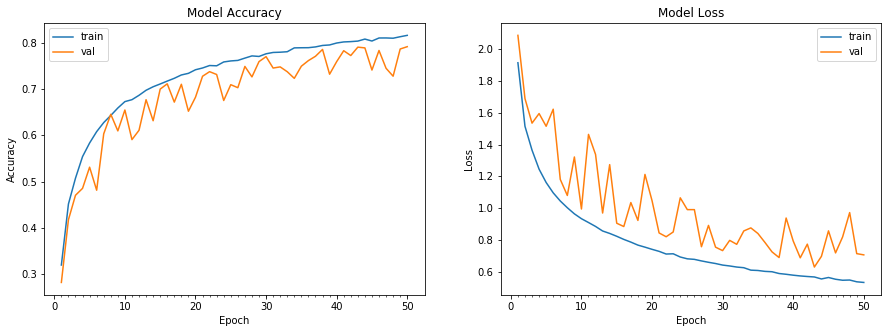

Accuracy on test data is: 79.11


In [0]:
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# model.load_weights('/content/gdrive/My Drive/Colab Notebooks/EVA/6/epochs:072-val_acc:0.842.hdf5')

# model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

score = model.evaluate(test_features, test_labels)#, steps = 10,verbose=0)
print(score[1])

10000/10000 [==============================] - 2s 178us/step
0.7911


In [0]:
print(score[1])

0.7911
